# Ecuación de onda 1D

$$
u_{tt} = c^2\, u_{xx} +F(t,x), \qquad u(0,x) = f(x),\; u_{t}(0,x) = g(x).
$$

Solución 
$$
u(x,t) = \frac{f(x-c\,t)+f(x+ c\, t)}{2}+ \frac{1}{2c} \int_{x-c\,t}^{x+c\,t}g(z)\, dz
+ \frac{1}{2c}\int_0^t \int_{x - c\left( t-s\right)}^{x + c\left( t-s\right)}F(s,y)\, dy\, ds
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [3]:
c = 1

In [4]:
w = 1
def f(x):
    return np.sin(w*np.pi*x)*np.exp(-x**2)

def g(x):
    if np.abs(x) <= 1: return 1-np.abs(x)
    else: return 0
    
def F(t,x): 
    return np.sin(w*t)*np.sin(x)

In [5]:
def u1(t,x):
    return (f(x-c*t)+f(x+c*t))/2

def u2(t,x):
    return integrate.quad(g, x-c*t,x+c*t)[0] 
u2 = np.vectorize(u2) 

def up(t,x):
    return (1/(2*c))*integrate.dblquad(F, 0,t, lambda s: x-c*(t-s), lambda s: x+c*(t-s))[0]
up = np.vectorize(up) 

In [6]:
t = 1.5
xx = np.linspace(-10, 10, 200)
yy0 = u1(t,xx)
yy1 = u2(t,xx)
yy2 = yy0 + yy1
yyp = up(t,xx)
yy3 = yyp+ yy2

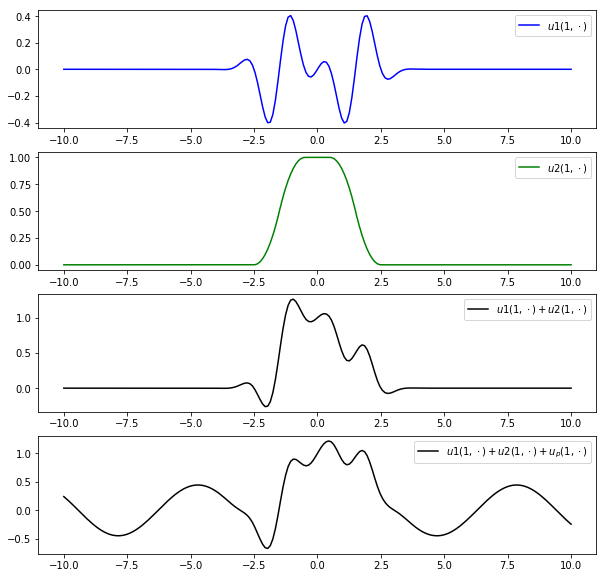

In [7]:
fig = plt.figure(figsize = (10,10))
##################################
ax0 = fig.add_subplot(411)
ax0.plot(xx, yy0, 'b', label=r'$u1(1, \cdot)$')
ax0.legend(loc='best')
###############################################
ax1 = fig.add_subplot(412)
ax1.plot(xx, yy1, 'g', label=r'$u2(1, \cdot)$')
ax1.legend(loc='best')
#########################################
ax2= fig.add_subplot(413)
ax2.plot(xx, yy2, 'k', label=r'$u1(1, \cdot)+u2(1, \cdot) $')
ax2.legend(loc='best')
#########################################
ax3= fig.add_subplot(414)
ax3.plot(xx, yy3, 'k', label=r'$u1(1, \cdot)+u2(1, \cdot) + u_p(1, \cdot)$')
ax3.legend(loc='best')
plt.show()

# El punto de vista de un sismográfo ubicado en $x$

In [8]:
x = 4.0
tt = np.linspace(0, 30, 300)
yy = up(tt,x) + u1(tt,x) + u2(tt,x)

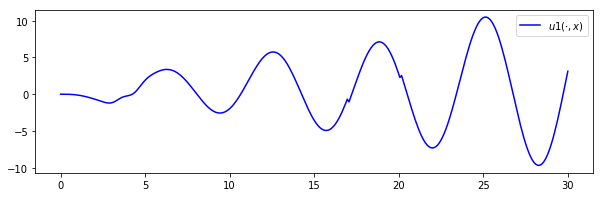

In [9]:
fig = plt.figure(figsize = (10,3))
ax = fig.add_subplot(111)
ax.plot(tt, yy, 'b', label=r'$u1(\cdot,x)$')
ax.legend(loc='best')
plt.show()

### 